In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import face_recognition as face_reg
import os
import time
import datetime

In [26]:
cj=face_reg.load_image_file("./sample_Image/Chigozie.jpg")
test_image=face_reg.load_image_file("./test_image/cj.jpg")
test_aro=face_reg.load_image_file("./test_image/ao1.jpeg")

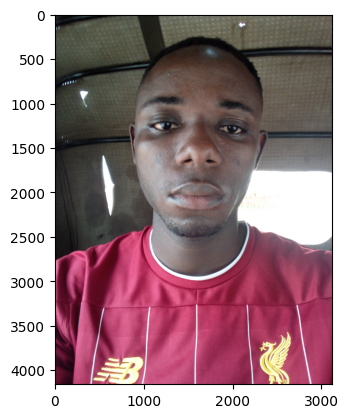

In [27]:
plt.imshow(cj)


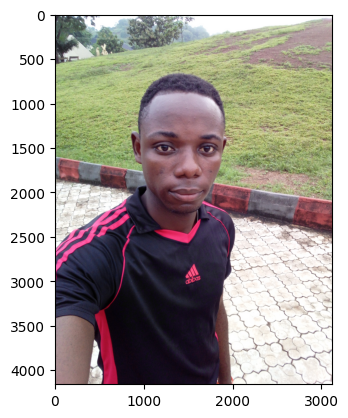

In [28]:
plt.imshow(test_image)

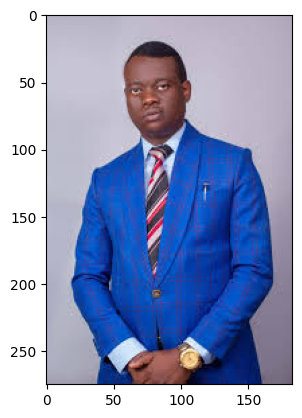

In [29]:
plt.imshow(test_aro)

In [30]:
cjLocation=face_reg.face_locations(cj)[0]
cjEncode=face_reg.face_encodings(cj)[0]
cj_mian=cv2.rectangle(cj.copy(),(cjLocation[3],cjLocation[0]),(cjLocation[1],cjLocation[2]),(255,0,0),20)

In [31]:
faceLocation=face_reg.face_locations(test_image)[0] 
faceEncode=face_reg.face_encodings(test_image)[0]
cj_test=cv2.rectangle(test_image.copy(),(faceLocation[3],faceLocation[0]),(faceLocation[1],faceLocation[2]),(0,0,225),18)

In [32]:
# To convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
# cj_test_rgb = cv2.cvtColor(cj_test, cv2.COLOR_BGR2RGB)

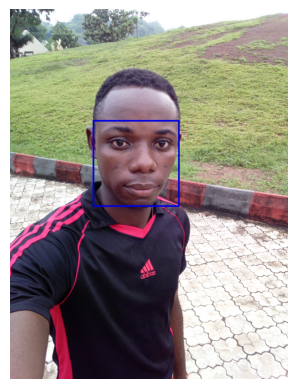

In [33]:
plt.imshow(cj_test)
# plt.imshow(cj_test_rgb) 
plt.axis('off') 
plt.show()

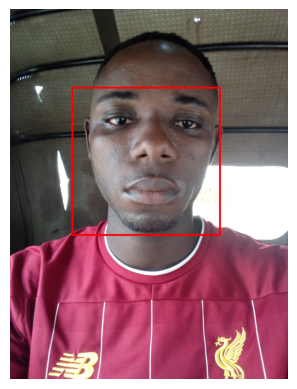

In [34]:
plt.imshow(cj_mian)
plt.axis('off') 
plt.show()

In [35]:
# To compare the image, to see if its the same person
face_reg.compare_faces([cjEncode], faceEncode)

[True]

**To check out with another image that is not me and see if it will work**

In [36]:
aroLocation=face_reg.face_locations(test_aro)[0] #picture of Star CJ
aroEncode=face_reg.face_encodings(test_aro)[0]  #picture of Apostle Arome

In [37]:
face_reg.compare_faces([cjEncode], aroEncode)

[False]

<h2>To prepare code to detect if any of the image is among those saved</h2>

In [38]:
# To get the names of the images
path='sample_Image/'
Ind_name=[]
Ind_img=[]
myList=os.listdir(path)
myList

['Arome.jpeg',
 'Chigozie.jpg',
 'cr7.jpeg',
 'elon_musk.jpeg',
 'pope_F.jpeg',
 'p_obi.jpeg']

In [39]:
for img in myList:
    images=cv2.imread(f'{path}{img}')
    Ind_img.append(images)
    Ind_name.append(os.path.splitext(img)[0])


Ind_name

['Arome', 'Chigozie', 'cr7', 'elon_musk', 'pope_F', 'p_obi']

In [44]:
Ind_img[0][1][0]

array([255, 255, 255], dtype=uint8)

In [41]:
def imgEncoding(imgs):
    encoding_list = []
    for i in imgs:
        try:
            encoding = face_reg.face_encodings(i)[0]
            encoding_list.append(encoding)
        except IndexError:
            print(f"No face detected in image: {i}")
    return encoding_list

In [45]:
individual_encoding=imgEncoding(Ind_img)

No face detected in image: [[[223 221 210]
  [223 221 210]
  [226 222 211]
  ...
  [217 178  86]
  [217 177  94]
  [220 180  97]]

 [[223 221 210]
  [223 221 210]
  [226 222 211]
  ...
  [207 166  73]
  [207 166  81]
  [210 169  84]]

 [[223 221 210]
  [223 221 210]
  [226 222 211]
  ...
  [199 157  61]
  [199 158  66]
  [202 161  69]]

 ...

 [[ 74  75 113]
  [ 72  75 113]
  [ 72  78 115]
  ...
  [ 74  62  34]
  [ 74  62  34]
  [ 73  61  33]]

 [[ 84  73 106]
  [ 82  73 106]
  [ 82  73 106]
  ...
  [ 73  61  33]
  [ 73  61  33]
  [ 73  61  33]]

 [[ 89  73 104]
  [ 89  73 104]
  [ 89  73 104]
  ...
  [ 73  61  33]
  [ 73  61  33]
  [ 73  61  33]]]


In [86]:
def attendance(name):
    with open('attendance.csv','r+') as f:
        d_List=f.readlines()
        nameList= []
        for lists in d_List:
            entry=lists.split('.')
            if len(entry) > 1:
                recorded_name = entry[0]
                recorded_date = entry[1].split(' ')[0]  # Extract date only
                nameList.append((recorded_name, recorded_date))

        # Get current date in a readable format
        current_date = datetime.now().strftime('%Y-%m-%d')

        # Check if the name and current date are not already present in the attendance list
        if (name, current_date) not in nameList:
            # If not, mark attendance with timestamp
            now = datetime.now()
            timestr = now.strftime('%Y-%m-%d %H:%M:%S')  # Format: Year-Month-Day Hour:Minute:Second
            f.writelines(f'\n{name},{timestr}')
        #     nameList.append(entry[0])
        
        # if name not in nameList:
        #     now=datetime.now()
        #     timestr= now.strftime('%Y-%m-%d %H:%M:%S')
        #     f.writelines(f'\n{name},{timestr}')


In [119]:
def attendance(name):
    today = datetime.date.today().strftime('%Y-%m-%d')
    try:
        # Read attendance data as DataFrame (handle potential file absence)
        data = pd.read_csv('attendance.csv', names=['Name', 'Time'])
    except FileNotFoundError:
        # Create an empty DataFrame if the CSV file doesn't exist
        data = pd.DataFrame(columns=['Name', 'Time'])

    # Check if the name and today's date already exist in the data
    if not data[(data['Name'] == name) & (data['Time'].str.contains(today))].empty:
        print(f"{name} is already marked present for today.")
        return

    now = datetime.datetime.now()
    timestr = now.strftime('%Y-%m-%d %H:%M:%S')

    # Create a new DataFrame with the new entry
    new_data = pd.DataFrame({'Name': [name], 'Time': [timestr]})

    # Concatenate the new data with the existing DataFrame
    data = pd.concat([data, new_data], ignore_index=True)

    # Save the updated data to the CSV file
    data.to_csv('attendance.csv', index=False)

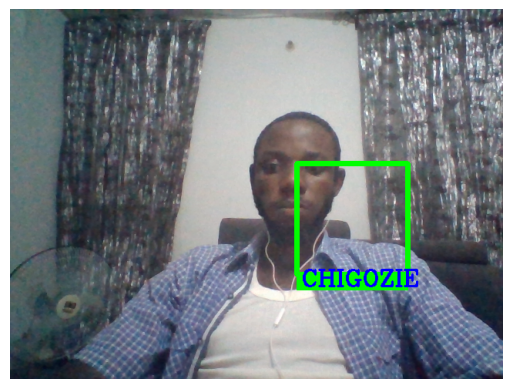

CHIGOZIE is already marked present for today.
CHIGOZIE is already marked present for today.
2 seconds have passed. Exiting...


In [120]:
# To open the webcam
capture=cv2.VideoCapture(0)

start_time = time.time()
max_duration = 2

shown_names = set()

while True:
    success, frame = capture.read()
    
    # Check if the frame was successfully captured
    if not success:
        print("Failed to capture any image from the webcam. Exiting...")
        break

    frameResize = cv2.resize(frame, (0, 0), None, 0.3, 0.3)
    faces_in_frame = face_reg.face_locations(frameResize)
    encoding_frame = face_reg.face_encodings(frameResize, faces_in_frame)

    for encoded_face, faceLoc in zip(encoding_frame, faces_in_frame):
        faces_comp = face_reg.compare_faces(individual_encoding, encoded_face)
        face_dis = face_reg.face_distance(individual_encoding, encoded_face)
        # print(face_dis)
        matchIndex = np.argmin(face_dis)

        # If there is a match, display the image name and draw the rectangle
        if faces_comp[matchIndex]:
            name = Ind_name[matchIndex].upper()
            (top, right, bottom, left) = faceLoc
            # Scale back_up face locations since the frame was reduced down
            (top, right, bottom, left) = (top * 4, right * 4, bottom * 4, left * 4)

            # Draw a rectangle around the face
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 5)
            # Draw a filled rectangle below the face
            cv2.rectangle(frame, (left, bottom + 20), (right, bottom), (0, 255, 0), cv2.FILLED)
            # To shwo the name
            cv2.putText(frame, name, (left + 6, bottom + 15), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 2)

            if name not in shown_names:
                attendance(name)
            
                # Display the frame
                plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                plt.axis('off') 
                plt.show()
                # Add name to shown set to prevent repeated display
                shown_names.add(name)

    # Call attendance function after checking for a match
    if faces_comp[matchIndex]:
        attendance(name)

    # Check if 30 seconds have passed
    elapsed_time = time.time() - start_time
    if elapsed_time >= max_duration:
        print("2 seconds have passed. Exiting...")
        break



In [121]:
# To release capture and close any Open windows
capture.release()
cv2.destroyAllWindows()